Using TensorFlow backend.


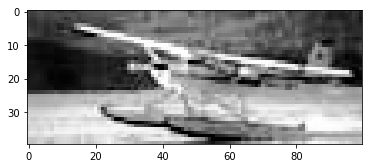

In [1]:
# Plot ad hoc CIFAR10 instances
from matplotlib import pyplot
from scipy.misc import toimage
import matplotlib.image as mpimg
from car_model import Dataset, CarModel
# Simple CNN model for DEMO
import numpy
from keras.utils import np_utils
from keras.models import model_from_json
seed = 42
numpy.random.seed(seed)


img = mpimg.imread('./CarDataset/TrainImages/neg-0.pgm')
pyplot.imshow(img, cmap='gray',vmin=0,vmax=255)
pyplot.show()

In [2]:
# load data
dataset = Dataset('./CarDataset', './CarDataset/car_labels.csv')
model = CarModel('./models/car2.h5')

2017-07-18 21:24:11,176 : INFO : shape of training data: (1049, 40, 100, 1)
2017-07-18 21:24:11,177 : INFO : Load data Done!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 3 columns):
Unnamed: 0    1049 non-null int64
files         1049 non-null object
labels        1049 non-null int64
dtypes: int64(2), object(1)
memory usage: 24.7+ KB
finished loading already dumped dataset
<open file './models/car2.json', mode 'r' at 0x7fe047e34390>
./models/car2.h5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 40, 100, 32)       320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 40, 100, 32)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 100, 32)       9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 50, 32)        0         
____________________________

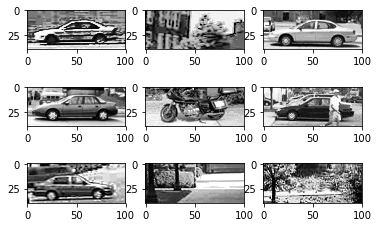

In [3]:
X_train, y_train, picture, label = dataset.getTrainTest()
# create a grid of 3x3 images
for i in range(0, 9):
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(X_train[i].reshape(40, 100), cmap='gray',vmin=0,vmax=255)
    
# show the plot
pyplot.show()

In [4]:
print model.getEvaluate(picture, label)

/root/anaconda2/envs/huytq/lib/python2.7/site-packages/keras/preprocessing/image.py:653: UserWarning: Expected input to be images (as Numpy array) following the data format convention "channels_last" (channels on axis 3), i.e. expected either 1, 3 or 4 channels on axis 3. However, it was passed an array with shape (315, 40, 100, 1) (1 channels).
  ' (' + str(x.shape[self.channel_axis]) + ' channels).')


acc: 99.653%
None


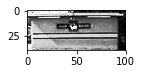

Label:  no_car
Predict:  no_car


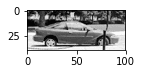

Label:  car
Predict:  car


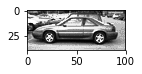

Label:  car
Predict:  car


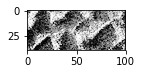

Label:  no_car
Predict:  no_car


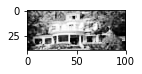

Label:  no_car
Predict:  no_car


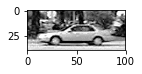

Label:  car
Predict:  car


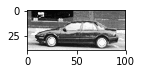

Label:  car
Predict:  car


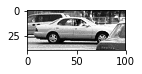

Label:  car
Predict:  car


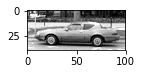

Label:  car
Predict:  car


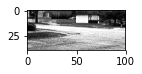

Label:  no_car
Predict:  no_car


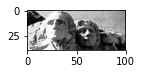

Label:  no_car
Predict:  no_car


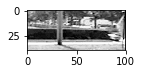

Label:  no_car
Predict:  no_car


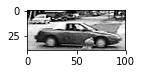

Label:  car
Predict:  car


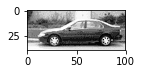

Label:  car
Predict:  car


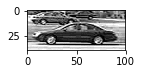

Label:  car
Predict:  car


In [5]:
"""
PREDICT
"""
import numpy as np
labels = ['no_car', 'car']
PREDICT_NUMBER = 15

for i in range (0, PREDICT_NUMBER):
    pyplot.subplot(330 + 1)
    pyplot.imshow(picture[i].reshape(40, 100), cmap='gray',vmin=0,vmax=255)
    pyplot.show() 

    print "Label: ", labels[np.argmax(label[i])]
    predict = model.predict(picture[i])
    print "Predict: ", labels[np.argmax(predict[-1])]

In [6]:
from os import listdir
from os.path import isfile, join
mypath = './CarDataset/cars_train/'
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath, f))]
test_car_data = []
test_car_labels = []
count = 0
for i in range (0, PREDICT_NUMBER):
    print "Label: 1" 
    predict = model.predict(onlyfiles[i], False)
    print "Predict: ", labels[np.argmax(predict[-1])]

Label: 1


ValueError: ('Unsupported image shape: ', ())

In [ ]:
x_test = test_set[0]
y_test = test_set[1]
print x_test.shape
print y_test.shape